# Linear Regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
data = pd.read_excel('surfaces.xls')
data.head()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,LIBELLE_LIGNE,ID_GROUPOFLIGNE,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,100,304,ASNIERES-SUR-SEINE (Les Courtilles) - GENNEVI...,A01135,DIJFP,8H-9H,4.60
1,100,100,304,ASNIERES-SUR-SEINE (Les Courtilles) - GENNEVI...,A01135,JOHV,17H-18H,7.97
2,100,100,304,ASNIERES-SUR-SEINE (Les Courtilles) - GENNEVI...,A01135,JOHV,2H-3H,0.01
3,100,100,304,ASNIERES-SUR-SEINE (Les Courtilles) - GENNEVI...,A01135,JOHV,10H-11H,5.63
4,100,100,304,ASNIERES-SUR-SEINE (Les Courtilles) - GENNEVI...,A01135,JOVS,6H-7H,3.08


In [ ]:
data["TRNC_HORR_60"]=data["TRNC_HORR_60"].map({"7H-8H":0, "8H-9H":1,"18H-19H":2, "17H-18H":3,"16H-17H":4,"6H-7H":5,"9H-10H":6,"12H-13H":7,"13H-14H":8,"15H-16H":9,"19H-20H":10,"11H-12H":11,"14H-15H":12,"10H-11H":14,"20H-21H":15,"5H-6H":16,"21H-22H":17,"22H-23H":18,"23H-0H":17,"0H-1H":18,"4H-5H":19,"1H-2H":20,"2H-3H":21,"3H-4H":22}) #convert Gender values into numerical

In [ ]:
indexNames = data[ data['CODE_STIF_LIGNE'] == 'ND' ].index
data.drop(indexNames , inplace=True)
indexNames = data[ data['CODE_STIF_RES'] == 'ND' ].index
data.drop(indexNames , inplace=True)
data=data.dropna()

In [ ]:
data.isnull().sum()

CODE_STIF_TRNS       0
CODE_STIF_RES        0
CODE_STIF_LIGNE      0
LIBELLE_LIGNE        0
ID_GROUPOFLIGNE      0
CAT_JOUR             0
TRNC_HORR_60         0
pourc_validations    0
dtype: int64

In [ ]:
data=data.drop(['ID_GROUPOFLIGNE','LIBELLE_LIGNE'], axis=1)

In [ ]:
data.isnull().sum()

CODE_STIF_TRNS       0
CODE_STIF_RES        0
CODE_STIF_LIGNE      0
CAT_JOUR             0
TRNC_HORR_60         0
pourc_validations    0
dtype: int64

In [ ]:
data['CODE_STIF_LIGNE'] = data['CODE_STIF_LIGNE'].astype(int)
data['CODE_STIF_RES'] = data['CODE_STIF_RES'].astype(int)

In [ ]:
data['CAT_JOUR'].value_counts()

JOHV     17582
JOVS     13856
DIJFP    12722
SAHV     10871
SAVS     10170
Name: CAT_JOUR, dtype: int64

In [ ]:
for i in data.index:
    if data["CAT_JOUR"][i]=="JOHV":
        data["CAT_JOUR"][i]="0"
    elif data["CAT_JOUR"][i]=="JOVS":
      data["CAT_JOUR"][i]="1"
    elif data["CAT_JOUR"][i]=="DIJFP":
      data["CAT_JOUR"][i]="2"
    elif data["CAT_JOUR"][i]=="SAHV":
      data["CAT_JOUR"][i]="3"
    else :
      data["CAT_JOUR"][i]="4"
data['CAT_JOUR'] = data['CAT_JOUR'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib

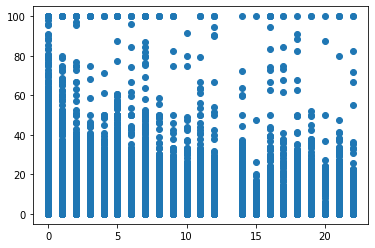

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=data['TRNC_HORR_60'], y=data['pourc_validations'])

In [ ]:
data.corr()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,CAT_JOUR,TRNC_HORR_60,pourc_validations
CODE_STIF_TRNS,1.000000,0.179662,0.326256,0.042657,0.042678,-0.036288
CODE_STIF_RES,0.179662,1.000000,0.224249,0.005314,0.085802,0.048962
CODE_STIF_LIGNE,0.326256,0.224249,1.000000,0.039634,0.094962,-0.025999
CAT_JOUR,0.042657,0.005314,0.039634,1.000000,-0.016906,0.057246
TRNC_HORR_60,0.042678,0.085802,0.094962,-0.016906,1.000000,-0.339605
pourc_validations,-0.036288,0.048962,-0.025999,0.057246,-0.339605,1.000000


In [ ]:
X = data.drop(['TRNC_HORR_60'], axis=1)
y = data['TRNC_HORR_60']

In [ ]:
len(y)

65201

In [ ]:
X

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_LIGNE,CAT_JOUR,pourc_validations
0,100,100,304,2,4.60
1,100,100,304,0,7.97
2,100,100,304,0,0.01
3,100,100,304,0,5.63
4,100,100,304,1,3.08
...,...,...,...,...,...
65530,100,100,148,0,1.02
65531,100,100,148,0,4.86
65532,100,100,148,0,9.80
65533,100,100,148,0,5.40


In [ ]:
X = data.drop(['pourc_validations'], axis=1)
y = data['pourc_validations']
y = np.array([0 if value <3 else 1 for value in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.2615004291508629

In [ ]:
lin.coef_

array([-1.03792597e-05,  7.67867609e-05,  6.50406167e-05,  3.40684201e-02,
       -3.73309293e-02])

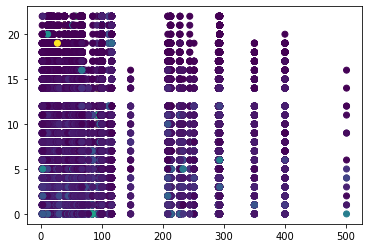

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=X['CODE_STIF_TRNS'], y=X['TRNC_HORR_60'], c=data['pourc_validations'])